In [2]:
import random
import string
import numpy as np
from re import search
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
regexpr = 'abcda'

def encode_letter(letter):
    if letter == "a":
        return [1, 0, 0, 0]
    elif letter == "b":
        return [0, 1, 0, 0]
    elif letter == "c":
        return [0, 0, 1, 0]
    elif letter == "d":
        return [0, 0, 0, 1]

strings = []

population_correct = 0

while population_correct < 5000:
    random_str = ''.join(random.choices(string.ascii_lowercase[:4], k=15))
    if search(regexpr, random_str):
        strings.append(random_str)
        population_correct += 1

strings.extend([''.join(random.choices(string.ascii_lowercase[:4], k=15)) for i in range(5000)])
strings = np.array(strings)

labels = np.array([1 if search(regexpr, s) else 0 for s in strings])
encoded_strings = []

for s in strings:
    encoding = np.zeros((len(s), 4))
    for i, letter in enumerate(s):
        encoding[i, :] = encode_letter(letter)
    encoded_strings.append(encoding)
encoded_strings = np.array(encoded_strings)
print(len(list(filter(lambda x: x == 1, labels))))

5056


In [3]:
strings_train, strings_test, labels_train, labels_test = train_test_split(encoded_strings, labels, test_size=0.2, shuffle=True, random_state=1)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Conv1D(1, kernel_size=5, input_shape = (15, 4), padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


#optimizer = Adam(learning_rate=0.0001)
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
model.summary()
print(strings_train.shape)

history = model.fit(
    strings_train, labels_train,
    batch_size=50,
    epochs = 100,
    validation_data = (strings_test, labels_test),
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 1)             21        
_________________________________________________________________
flatten (Flatten)            (None, 11)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 12        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
(8000, 15, 4)
Epoch 1/100
160/160 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.5095 - val_loss: 0.6941 - val_accuracy: 0.5310
Epoch 2/100
160/160 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5257 - val_loss: 0.6867 - val_accuracy: 0.5380
Epoch 3/100
160/160 [==============================] - 0s 1ms/step - loss: 0.6850 - accura

Epoch 53/100
160/160 [==============================] - 0s 1ms/step - loss: 7.6033e-04 - accuracy: 1.0000 - val_loss: 6.9310e-04 - val_accuracy: 1.0000
Epoch 54/100
160/160 [==============================] - 0s 2ms/step - loss: 6.3107e-04 - accuracy: 1.0000 - val_loss: 5.7342e-04 - val_accuracy: 1.0000
Epoch 55/100
160/160 [==============================] - 0s 1ms/step - loss: 5.2603e-04 - accuracy: 1.0000 - val_loss: 4.7687e-04 - val_accuracy: 1.0000
Epoch 56/100
160/160 [==============================] - 0s 1ms/step - loss: 4.7525e-04 - accuracy: 1.0000 - val_loss: 4.6821e-04 - val_accuracy: 1.0000
Epoch 57/100
160/160 [==============================] - 0s 1ms/step - loss: 4.6676e-04 - accuracy: 1.0000 - val_loss: 4.5959e-04 - val_accuracy: 1.0000
Epoch 58/100
160/160 [==============================] - 0s 1ms/step - loss: 4.5842e-04 - accuracy: 1.0000 - val_loss: 4.5114e-04 - val_accuracy: 1.0000
Epoch 59/100
160/160 [==============================] - 0s 2ms/step - loss: 4.5024e-04 -

In [7]:
filt, bias = model.layers[0].get_weights()

In [8]:
filt

array([[[ 0.8652016 ],
        [-2.8558435 ],
        [-2.8558435 ],
        [-2.8558462 ]],

       [[-2.2992623 ],
        [ 1.4217831 ],
        [-2.2994955 ],
        [-2.2992618 ]],

       [[-2.479928  ],
        [-2.4799278 ],
        [ 1.2411165 ],
        [-2.4799278 ]],

       [[-2.7438388 ],
        [-2.743841  ],
        [-2.7438395 ],
        [ 0.97720695]],

       [[ 0.7210865 ],
        [-2.999962  ],
        [-2.9999592 ],
        [-2.9999602 ]]], dtype=float32)

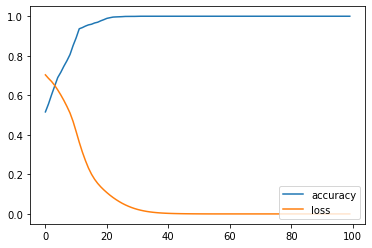

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='lower right')

In [11]:
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Conv1D(25, kernel_size=5, input_shape = (15, 4), padding='same', activation='sigmoid'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))


    optimizer = Adam(lr=0.001)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy', 
        metrics=['accuracy']
    )
    model.summary()
    print(strings_train.shape)

    history = model.fit(
        strings_train, labels_train,
        batch_size=5,
        epochs = 20,
        validation_data = (strings_test, labels_test)
    )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 15, 25)            525       
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 376       
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
(8000, 15, 4)
Epoch 1/20
1600/1600 [==============================] - 1s 719us/step - loss: 0.6834 - accuracy: 0.5585 - val_loss: 0.6580 - val_accuracy: 0.6200
Epoch 2/20
1600/1600 [==============================] - 1s 660us/step - loss: 0.6543 - accuracy: 0.6083 - val_loss: 0.6531 - val_accuracy: 0.5965
Epoch 3/20
1600/1600 [==============================] - 1s 662us/step - loss: 0.